# Table row detector

In [1]:
%load_ext autoreload
%autoreload 2

import yaml
import json 
from PIL import Image
import matplotlib.pyplot as plt
from tools import display_bb, get_table_df, get_bb_mask

In [2]:
api_output = "data/api_output_000000001576.json"
source = "data/000000001576.nutrition.jpg"

# Opening JSON file and load data
with open(api_output,) as f:
    json_data = json.load(f) 

##Config file
with open("config.yml", "r") as ymlfile:
    cfg = yaml.load(ymlfile, Loader=yaml.FullLoader)
    
#data path
base_path = cfg["base_path"]

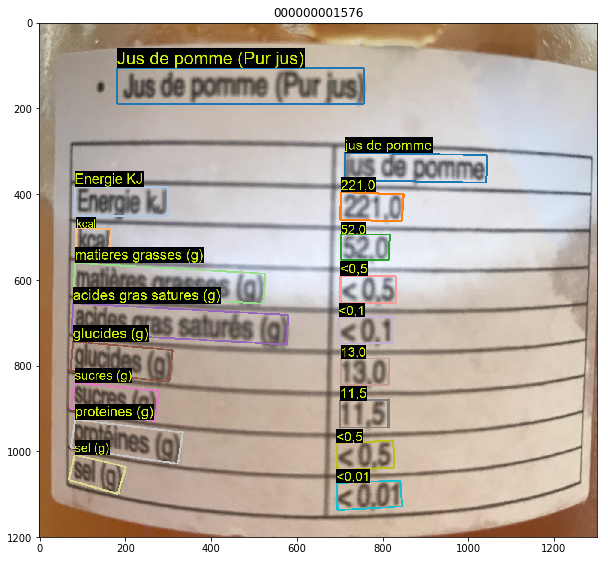

,0,1
0,Energie KJ,"221,0"
1,kcal,52.0
2,matieres grasses (g),"<0,5"
3,acides gras satures (g),"<0,1"
4,glucides (g),"13,0"
5,sucres (g),"11,5"
6,proteines (g),"<0,5"
7,sel (g),"<0,01"


In [3]:
lines = json_data['analyzeResult']['readResults'][0]['lines']
display_bb(source, lines, base_path)
plt.show()
df = get_table_df(json_data)
display(df)


## Clustering technique

In [4]:
angle = json_data['analyzeResult']['readResults'][0]["angle"]
angle_deg = angle * 57.2958

In [5]:
colorImage  = Image.open(source)

# Rotate it by 45 degrees
rotated     = colorImage.rotate(angle)


# Display the Original Image
colorImage.show()

# Display the Image rotated by 45 degrees
rotated.show()

plt.show()

In [6]:
from math import tan
data_points = {}
for (i,line) in enumerate(json_data['analyzeResult']['readResults'][0]['lines']):
    bb = line["boundingBox"]
    x0, y0 = bb[0], bb[1]
    x1, y1 = bb[2], bb[3]
    x2, y2 = bb[4], bb[5]
    x3, y3 = bb[6], bb[7]
    
    angle_deg = angle * 57.2958
    a0, b0 = y0 * tan(angle_deg) + x0, x0 * tan(angle_deg) + y0
    a3, b3 = y3 * tan(angle_deg) + x3, x3 * tan(angle_deg) + y3
    
    #y_mean = int((x0 + x1 + x2 + x3)/4) + i / 1000
    y_mean = int((b0 + b3) / 2 ) + i / 1000
    data_points[(1, y_mean)] = bb

In [7]:
sample = list(data_points.keys())
sample

[(1, 130.0),
 (1, 266.001),
 (1, 409.002),
 (1, 360.003),
 (1, 496.004),
 (1, 455.005),
 (1, 586.006),
 (1, 554.007),
 (1, 681.008),
 (1, 649.009),
 (1, 771.01),
 (1, 746.011),
 (1, 862.012),
 (1, 844.013),
 (1, 951.014),
 (1, 944.015),
 (1, 1030.016),
 (1, 1037.017)]

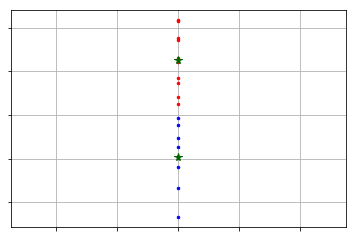

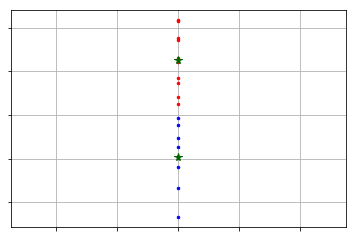

In [8]:
from pyclustering.cluster import cluster_visualizer
from pyclustering.cluster.xmeans import xmeans
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer
from pyclustering.utils import read_sample
from pyclustering.samples.definitions import SIMPLE_SAMPLES

# Prepare initial centers - amount of initial centers defines amount of clusters from which X-Means will
# start analysis.
amount_initial_centers = 2
initial_centers = kmeans_plusplus_initializer(sample, amount_initial_centers).initialize()
# Create instance of X-Means algorithm. The algorithm will start analysis from 2 clusters, the maximum
# number of clusters that can be allocated is 20.
xmeans_instance = xmeans(sample, initial_centers, 20)
xmeans_instance.process()
# Extract clustering results: clusters and their centers
clusters = xmeans_instance.get_clusters()
centers = xmeans_instance.get_centers()
# Visualize clustering results
visualizer = cluster_visualizer()
visualizer.append_clusters(clusters, sample)
visualizer.append_cluster(centers, None, marker='*', markersize=8)
visualizer.show()

In [9]:
clusters

[[8, 9, 10, 11, 12, 13, 14, 15, 16, 17], [0, 1, 2, 3, 4, 5, 6, 7]]

## Histogram technique

In [10]:
from tools import display_bb, get_table_df, get_bb_mask
import cv2

In [11]:
angle_deg

59.59336158

In [12]:
bb_mask = get_bb_mask(source, json_data, 0)

(1200, 1302)


In [13]:
bb_mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

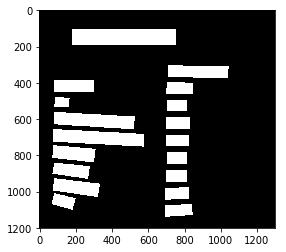

In [14]:
plt.imshow(bb_mask, cmap="gray")

- la médiane
- 

In [15]:
bb_mask.shape

(1200, 1302)

In [16]:
h_hist = bb_mask.sum(axis=1) 
h_hist = h_hist / max(h_hist)

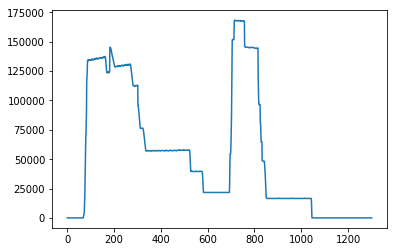

In [17]:
plt.plot(bb_mask.sum(axis=0))

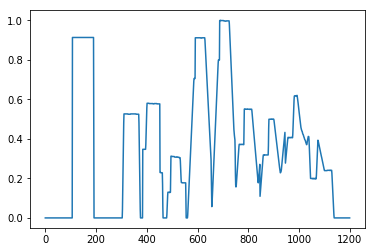

In [18]:
plt.plot(h_hist)

In [19]:
def IOU(y0, y3, b0, b3):
    u = min(max(y0, b0) - min(y3, b3), y0 - y3 + b0 - b3 )
    i = max(min(y0, b0) - max(y3, b3), 0 )
    return i / u

In [22]:
from tools import get_iou, iou
res = get_iou(json_data, threshold=0.2)

0 1
107 190 304 368
0.0
----------------------------------------
0 2
107 190 384 451
0.0
----------------------------------------
0 3
107 190 396 461
0.0
----------------------------------------
0 4
107 190 479 531
0.0
----------------------------------------
0 5
107 190 494 554
0.0
----------------------------------------
0 6
107 190 561 628
0.0
----------------------------------------
0 7
107 190 591 655
0.0
----------------------------------------
0 8
107 190 655 724
0.0
----------------------------------------
0 9
107 190 687 749
0.0
----------------------------------------
0 10
107 190 744 813
0.0
----------------------------------------
0 11
107 190 784 845
0.0
----------------------------------------
0 12
107 190 840 900
0.0
----------------------------------------
0 13
107 190 881 945
0.0
----------------------------------------
0 14
107 190 926 992
0.0
----------------------------------------
0 15
107 190 981 1044
0.0
----------------------------------------
0 16
107 190 1008 

In [23]:
res

{0: [],
 1: [],
 2: [{'id': 3, 'iou_value': 0.7142857142857143}],
 3: [{'id': 2, 'iou_value': 0.7142857142857143}],
 4: [{'id': 5, 'iou_value': 0.49333333333333335}],
 5: [{'id': 4, 'iou_value': 0.49333333333333335}],
 6: [{'id': 7, 'iou_value': 0.39361702127659576}],
 7: [{'id': 6, 'iou_value': 0.39361702127659576}],
 8: [{'id': 9, 'iou_value': 0.39361702127659576}],
 9: [{'id': 8, 'iou_value': 0.39361702127659576}],
 10: [{'id': 11, 'iou_value': 0.2871287128712871}],
 11: [{'id': 10, 'iou_value': 0.2871287128712871}],
 12: [],
 13: [],
 14: [],
 15: [{'id': 16, 'iou_value': 0.4186046511627907}],
 16: [{'id': 15, 'iou_value': 0.4186046511627907}],
 17: []}